<a href="https://colab.research.google.com/github/Heena203T1A3134/EV_Market/blob/main/EV(Market)_heena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Electric Vehicle (EV) market is witnessing rapid growth globally, driven by increasing environmental concerns, government incentives, and advancements in battery technology. As the world moves towards sustainable transportation solutions, EV startups play a crucial role in shaping the market landscape. This report focuses on analyzing the EV market in India and developing a segmentation strategy to identify target customer segments for an EV startup. Through segmentation analysis, the goal is to identify geographic, demographic, psychographic, and behavioral factors that influence EV adoption, ultimately guiding the startup's market entry strategy."









In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Import necessary libraries for data analysis and visualization, including NumPy, Pandas, Matplotlib, Seaborn, NLTK for sentiment analysis, and Scikit-learn for preprocessing, PCA, and clustering algorithms. Remember to handle warnings appropriately. Use StandardScaler and MinMaxScaler for feature scaling, PCA for dimensionality reduction, and KMeans for clustering.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings


**Data Processing**

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/EV_Data.xlsx", sheet_name=None)
data['Sheet1']

,Region,Year,Population (millions),EV Sales (annual),EV Market Share (%),Popular EV Models,Total Vehicle Sales (annual),Vehicle Preferences,Average Vehicle Age (years),Number of Charging Stations,...,Pollution Levels,Age Distribution (%),Median Income (INR),Education Levels (%),Environmental Awareness (%),Technology Adoption (%),Lifestyle Preferences (%),Purchase Intentions (%),Brand Loyalty (%),Influencing Factors
0,Delhi,2020,19,3000,1.50,"Tata Nexon EV, MG ZS EV",200000,"Sedans, SUVs",6.0,200,...,High,"0-14: 20%, 15-64: 70%, 65+: 10%",320000,88,75,80,Urban-centric,35.0,55.0,"Pollution levels, Commute time, Fuel cost savings"
1,Delhi,2021,19,3500,1.75,"Tata Nexon EV, MG ZS EV",205000,"Sedans, SUVs",6.2,230,...,High,"0-14: 20%, 15-64: 70%, 65+: 10%",330000,89,76,81,Urban-centric,37.0,57.0,"Pollution levels, Commute time, Fuel cost savings"
2,Delhi,2022,19,4500,2.25,"Tata Nexon EV, MG ZS EV",210000,"Sedans, SUVs",6.4,270,...,High,"0-14: 20%, 15-64: 70%, 65+: 10%",340000,90,78,82,Urban-centric,39.0,59.0,"Pollution levels, Commute time, Fuel cost savings"
3,Delhi,2023,19,5000,2.50,"Tata Nexon EV, MG ZS EV",220000,"Sedans, SUVs",6.6,300,...,High,"0-14: 20%, 15-64: 70%, 65+: 10%",350000,90,80,85,Urban-centric,40.0,60.0,"Pollution levels, Commute time, Fuel cost savings"
4,Mumbai,2020,18,2800,1.60,"Tata Nexon EV, Hyundai Kona",210000,"Sedans, Hatchbacks",5.2,180,...,Very High,"0-14: 18%, 15-64: 72%, 65+: 10%",300000,85,72,78,Urban-centric,32.0,52.0,"Traffic congestion, Air quality, Government in..."
5,Mumbai,2021,18,3500,1.90,"Tata Nexon EV, Hyundai Kona",215000,"Sedans, Hatchbacks",5.3,200,...,Very High,"0-14: 18%, 15-64: 72%, 65+: 10%",310000,86,73,79,Urban-centric,34.0,54.0,"Traffic congestion, Air quality, Government in..."
6,Mumbai,2022,18,4000,2.00,"Tata Nexon EV, Hyundai Kona",220000,"Sedans, Hatchbacks",5.4,230,...,Very High,"0-14: 18%, 15-64: 72%, 65+: 10%",320000,87,75,80,Urban-centric,36.0,56.0,"Traffic congestion, Air quality, Government in..."
7,Mumbai,2023,18,4500,2.20,"Tata Nexon EV, Hyundai Kona",220000,"Sedans, Hatchbacks",5.5,250,...,Very High,"0-14: 18%, 15-64: 72%, 65+: 10%",320000,88,78,82,Urban-centric,38.0,58.0,"Traffic congestion, Air quality, Government in..."
8,Bengaluru,2020,12,4000,3.30,"Ather 450X, Tata Nexon EV",170000,"Sedans, Two-wheelers",4.0,300,...,Moderate,"0-14: 21%, 15-64: 68%, 65+: 11%",320000,90,78,83,Tech-savvy,42.0,65.0,"Tech adoption, Environmental concern, Fuel eff..."
9,Bengaluru,2021,12,5000,4.20,"Ather 450X, Tata Nexon EV",175000,"Sedans, Two-wheelers",4.2,350,...,Moderate,"0-14: 21%, 15-64: 68%, 65+: 11%",330000,91,80,85,Tech-savvy,44.0,67.0,"Tech adoption, Environmental concern, Fuel eff..."


In [ ]:

# Access the DataFrame for the sheet named 'Sheet1'
data_sheet1 = data['Sheet1']

# Display the first few rows of the DataFrame to ensure it loaded correctly
print(data_sheet1.head())

   Region  Year  Population (millions)  EV Sales (annual)  \
0   Delhi  2020                     19               3000   
1   Delhi  2021                     19               3500   
2   Delhi  2022                     19               4500   
3   Delhi  2023                     19               5000   
4  Mumbai  2020                     18               2800   

   EV Market Share (%)            Popular EV Models  \
0                 1.50      Tata Nexon EV, MG ZS EV   
1                 1.75      Tata Nexon EV, MG ZS EV   
2                 2.25      Tata Nexon EV, MG ZS EV   
3                 2.50      Tata Nexon EV, MG ZS EV   
4                 1.60  Tata Nexon EV, Hyundai Kona   

   Total Vehicle Sales (annual) Vehicle Preferences  \
0                        200000        Sedans, SUVs   
1                        205000        Sedans, SUVs   
2                        210000        Sedans, SUVs   
3                        220000        Sedans, SUVs   
4                        21

In [ ]:
# Check for missing values
print(data_sheet1.isnull().sum())

Region                                        0
Year                                          0
Population (millions)                         0
EV Sales (annual)                             0
EV Market Share (%)                           0
Popular EV Models                             0
Total Vehicle Sales (annual)                  0
Vehicle Preferences                           0
Average Vehicle Age (years)                   0
Number of Charging Stations                   0
Charging Infrastructure                       0
Charging Station Density (per 1000 capita)    0
Commuting Habits                              0
Traffic Congestion                            0
Pollution Levels                              0
Age Distribution (%)                          0
Median Income (INR)                           0
Education Levels (%)                          0
Environmental Awareness (%)                   0
Technology Adoption (%)                       0
Lifestyle Preferences (%)               

In [ ]:
# Convert columns to appropriate data types
data_sheet1['Year'] = data_sheet1['Year'].astype(int)
data_sheet1['Population (millions)'] = data_sheet1['Population (millions)'].astype(float)
data_sheet1['EV Sales (annual)'] = data_sheet1['EV Sales (annual)'].astype(int)
data_sheet1['EV Market Share (%)'] = data_sheet1['EV Market Share (%)'].astype(float)
data_sheet1['Total Vehicle Sales (annual)'] = data_sheet1['Total Vehicle Sales (annual)'].astype(int)
data_sheet1['Average Vehicle Age (years)'] = data_sheet1['Average Vehicle Age (years)'].astype(float)
data_sheet1['Number of Charging Stations'] = data_sheet1['Number of Charging Stations'].astype(int)
data_sheet1['Charging Station Density (per 1000 capita)'] = data_sheet1['Charging Station Density (per 1000 capita)'].astype(float)
data_sheet1['Median Income (INR)'] = data_sheet1['Median Income (INR)'].astype(float)
data_sheet1['Purchase Intentions (%)'] =data_sheet1['Purchase Intentions (%)'].astype(float)
data_sheet1['Brand Loyalty (%)'] = data_sheet1['Brand Loyalty (%)'].astype(float)

# Ensure the changes are applied
print(data_sheet1.dtypes)


Region                                         object
Year                                            int64
Population (millions)                         float64
EV Sales (annual)                               int64
EV Market Share (%)                           float64
Popular EV Models                              object
Total Vehicle Sales (annual)                    int64
Vehicle Preferences                            object
Average Vehicle Age (years)                   float64
Number of Charging Stations                     int64
Charging Infrastructure                        object
Charging Station Density (per 1000 capita)    float64
Commuting Habits                               object
Traffic Congestion                             object
Pollution Levels                               object
Age Distribution (%)                           object
Median Income (INR)                           float64
Education Levels (%)                          float64
Environmental Awareness (%) 

In [ ]:
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Select numeric columns to scale
numeric_columns = [
    'Population (millions)', 'EV Sales (annual)', 'EV Market Share (%)',
    'Total Vehicle Sales (annual)', 'Average Vehicle Age (years)',
    'Number of Charging Stations', 'Charging Station Density (per 1000 capita)',
    'Median Income (INR)', 'Purchase Intentions (%)', 'Brand Loyalty (%)'
]

# Fit and transform the selected columns
data_sheet1[numeric_columns] = scaler.fit_transform(data_sheet1[numeric_columns])

# Display the scaled DataFrame
print(data_sheet1.head())


   Region  Year  Population (millions)  EV Sales (annual)  \
0   Delhi     0               1.000000                0.0   
1   Delhi     0               1.000000                0.0   
2   Delhi     0               1.000000                0.0   
3   Delhi     1               1.000000                0.0   
4  Mumbai     0               0.928571                0.0   

   EV Market Share (%)            Popular EV Models  \
0             0.000000      Tata Nexon EV, MG ZS EV   
1             0.071429      Tata Nexon EV, MG ZS EV   
2             0.214286      Tata Nexon EV, MG ZS EV   
3             0.285714      Tata Nexon EV, MG ZS EV   
4             0.028571  Tata Nexon EV, Hyundai Kona   

   Total Vehicle Sales (annual) Vehicle Preferences  \
0                           0.0        Sedans, SUVs   
1                           0.0        Sedans, SUVs   
2                           0.0        Sedans, SUVs   
3                           1.0        Sedans, SUVs   
4                          

In [ ]:
print(data_sheet1.describe())


            Year  Population (millions)  EV Sales (annual)  \
count  60.000000              60.000000               60.0   
mean    0.250000               0.304762                0.0   
std     0.436667               0.315041                0.0   
min     0.000000               0.000000                0.0   
25%     0.000000               0.071429                0.0   
50%     0.000000               0.142857                0.0   
75%     0.250000               0.500000                0.0   
max     1.000000               1.000000                0.0   

       EV Market Share (%)  Total Vehicle Sales (annual)  \
count            60.000000                     60.000000   
mean              0.325714                      0.050000   
std               0.213838                      0.219784   
min               0.000000                      0.000000   
25%               0.164286                      0.000000   
50%               0.285714                      0.000000   
75%               0.4

**Segmentation based Year, EV Sales (annual), and Total Vehicle Sales (annual)** allows for a detailed analysis of EV adoption trends over time and comparison with overall vehicle sales. By understanding these trends, businesses and policymakers can make informed decisions to accelerate the transition to electric mobility and address challenges in the automotive industry.

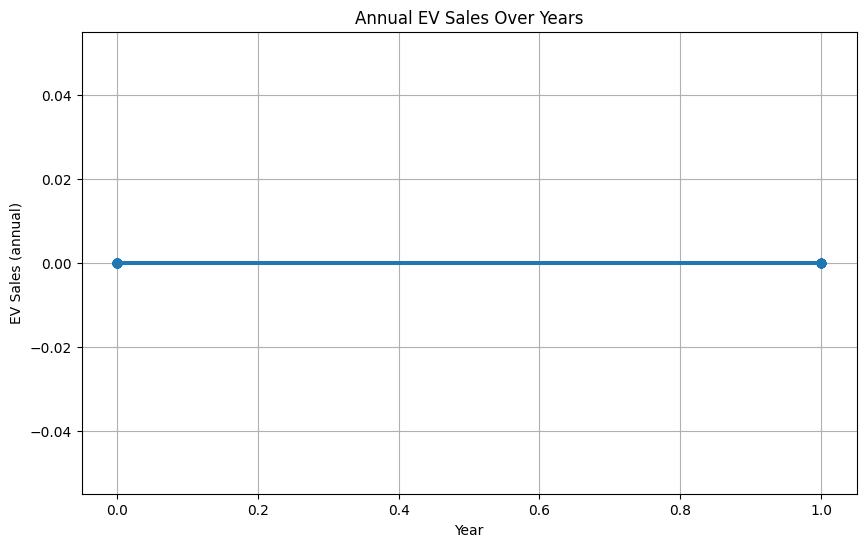

In [ ]:
# Plot EV Sales over the Years
plt.figure(figsize=(10, 6))
plt.plot(data_sheet1['Year'], data_sheet1['EV Sales (annual)'], marker='o')
plt.title('Annual EV Sales Over Years')
plt.xlabel('Year')
plt.ylabel('EV Sales (annual)')
plt.grid(True)
plt.show()


The code calculates the mean EV sales, total vehicle sales, and EV market share for each year in the dataset.


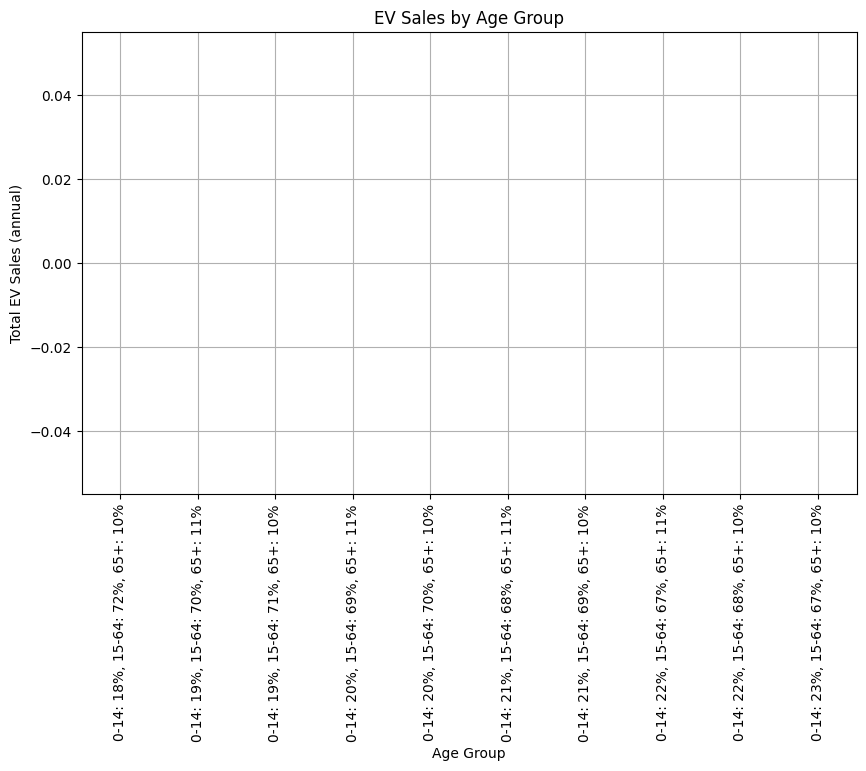

In [ ]:
# Group data by Age Group and sum EV Sales
age_group_sales = data_sheet1.groupby('Age Distribution (%)')['EV Sales (annual)'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
age_group_sales.plot(kind='bar', color='skyblue')
plt.title('EV Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total EV Sales (annual)')
plt.grid(True)
plt.show()


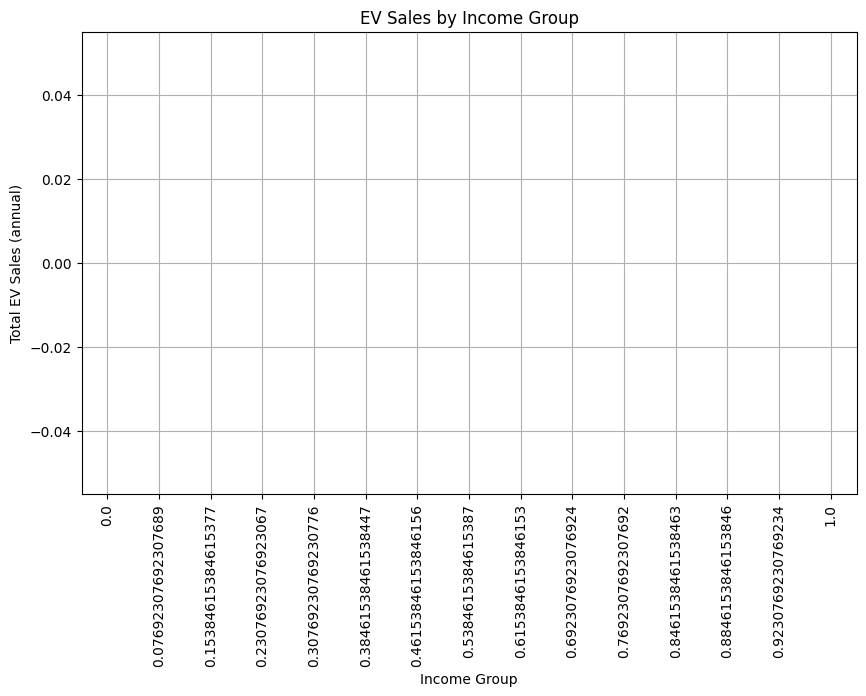

In [ ]:
# Group data by Income Group and sum EV Sales
income_group_sales = data_sheet1.groupby('Median Income (INR)')['EV Sales (annual)'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
income_group_sales.plot(kind='bar', color='lightgreen')
plt.title('EV Sales by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Total EV Sales (annual)')
plt.grid(True)
plt.show()


For visualization, let's create a line chart comparing EV sales and total vehicle sales over the years. The code creates a line chart showing the trend of EV sales compared to total vehicle sales over the years.

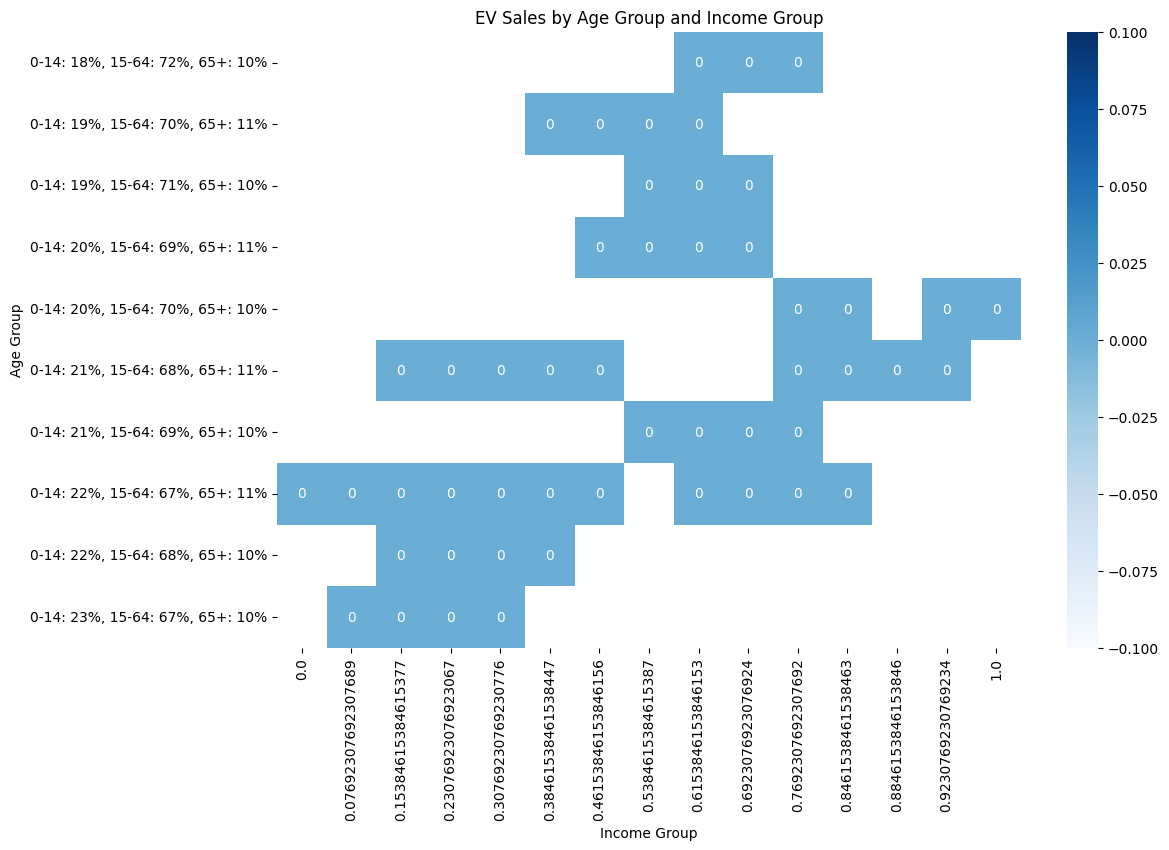

In [ ]:
# Pivot table to analyze EV Sales by Age Group and Income Group
pivot_table = data_sheet1.pivot_table(values='EV Sales (annual)',
                               index='Age Distribution (%)',
                               columns='Median Income (INR)',
                               aggfunc='sum')

# Plot the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues')
plt.title('EV Sales by Age Group and Income Group')
plt.xlabel('Income Group')
plt.ylabel('Age Group')
plt.show()


**Segmentation based on Region and Vehicle Preferences**

These plot provide insights into how EV sales have evolved relative to total vehicle sales, allowing stakeholders to understand the market dynamics and plan strategies accordingly.

In [ ]:
# Group the data by Region and Vehicle Preferences
grouped_data = data_sheet1.groupby(['Region', 'Vehicle Preferences'])


In [ ]:
# Analyze each segment
for (region, preferences), group_data in grouped_data:
    print(f"Region: {region}, Vehicle Preferences: {preferences}")
    total_sales = group_data['Total Vehicle Sales (annual)'].sum()
    print(f"Total Vehicle Sales (annual): {total_sales}")
    popular_models = group_data['Popular EV Models'].unique()
    print(f"Popular EV Models: {', '.join(popular_models)}")
    print()


Region: Ahmedabad, Vehicle Preferences: Sedans, SUVs
Total Vehicle Sales (annual): 0.0
Popular EV Models: MG ZS EV, Tata Nexon EV

Region: Bengaluru, Vehicle Preferences: Sedans, Two-wheelers
Total Vehicle Sales (annual): 0.0
Popular EV Models: Ather 450X, Tata Nexon EV

Region: Chennai, Vehicle Preferences: Sedans, SUVs
Total Vehicle Sales (annual): 0.0
Popular EV Models: Hyundai Kona, MG ZS EV

Region: Delhi, Vehicle Preferences: Sedans, SUVs
Total Vehicle Sales (annual): 1.0
Popular EV Models: Tata Nexon EV, MG ZS EV

Region: Goa, Vehicle Preferences: SUVs, Sedans
Total Vehicle Sales (annual): 0.0
Popular EV Models: Tata Nexon EV, MG ZS EV

Region: Hyderabad, Vehicle Preferences: Sedans, Two-wheelers
Total Vehicle Sales (annual): 0.0
Popular EV Models: Tata Nexon EV, Ather 450X

Region: Jaipur, Vehicle Preferences: SUVs, Sedans
Total Vehicle Sales (annual): 0.0
Popular EV Models: Tata Nexon EV, Hyundai Kona

Region: Kanpur, Vehicle Preferences: Sedans, SUVs
Total Vehicle Sales (annu

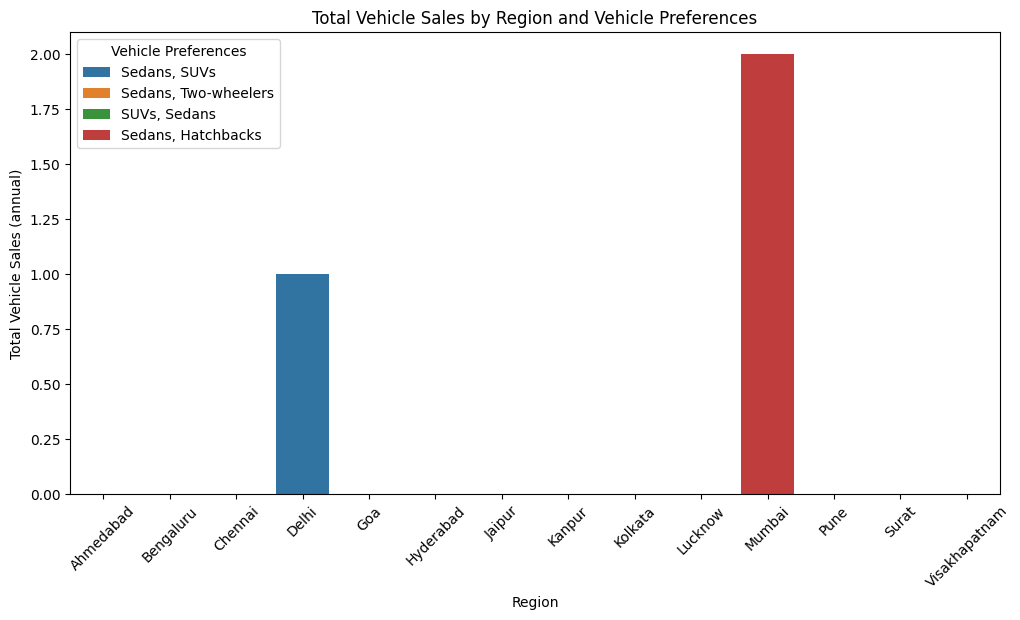

In [ ]:
# Aggregate the grouped data
grouped_data = grouped_data.agg({'Total Vehicle Sales (annual)': 'sum'}).reset_index()

# Visualize Total Vehicle Sales by Region and Vehicle Preferences
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Vehicle Sales (annual)', hue='Vehicle Preferences', data=grouped_data)
plt.title('Total Vehicle Sales by Region and Vehicle Preferences')
plt.xlabel('Region')
plt.ylabel('Total Vehicle Sales (annual)')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Preferences')
plt.show()


The bar chart displaying the total vehicle sales by region and the vehicle preferences in those regions across India.
The y-axis represents the total vehicle sales in millions, while the x-axis lists different regions in India.
The bars are color-coded based on the vehicle preferences in each region, which are combinations of sedans, SUVs, two-wheelers, and hatchbacks.
Some key observations from the chart:

Mumbai has the highest total vehicle sales compared to other regions.
The vehicle preference in most regions is a combination of sedans and SUVs, except for a few like Chennai and Goa, where two-wheelers are also a popular preference along with sedans.
Regions like Ahmedabad and Bangalore have a more diverse vehicle preference, including sedans, SUVs, two-wheelers, and hatchbacks.

This chart provides insights into the regional variations in vehicle sales and preferences across different vehicle categories in India, which could be useful for market segmentation and targeting strategies for various automotive companies, including electric vehicle manufacturers.

In [ ]:
# Group data by region
region_grouped = data_sheet1.groupby('Region')

# Explore the groups
for region, group_data in region_grouped:
    print("Region:", region)
    print(group_data)


Region: Ahmedabad
       Region  Year  Population (millions)  EV Sales (annual)  \
24  Ahmedabad   0.0               0.214286                0.0   
25  Ahmedabad   0.0               0.214286                0.0   
26  Ahmedabad   0.0               0.214286                0.0   
27  Ahmedabad   1.0               0.214286                0.0   

    EV Market Share (%)        Popular EV Models  \
24             0.142857  MG ZS EV, Tata Nexon EV   
25             0.285714  MG ZS EV, Tata Nexon EV   
26             0.342857  MG ZS EV, Tata Nexon EV   
27             0.428571  MG ZS EV, Tata Nexon EV   

    Total Vehicle Sales (annual) Vehicle Preferences  \
24                           0.0        Sedans, SUVs   
25                           0.0        Sedans, SUVs   
26                           0.0        Sedans, SUVs   
27                           0.0        Sedans, SUVs   

    Average Vehicle Age (years)  Number of Charging Stations  ...  \
24                     0.200000              

In [ ]:
# Calculate total EV sales annually for each region
ev_sales_annual = region_grouped['EV Sales (annual)'].sum()
print(ev_sales_annual)


Region
Ahmedabad        0.0
Bengaluru        0.0
Chennai          0.0
Delhi            0.0
Goa              0.0
Hyderabad        0.0
Jaipur           0.0
Kanpur           0.0
Kolkata          0.0
Lucknow          0.0
Mumbai           0.0
Pune             0.0
Surat            0.0
Visakhapatnam    0.0
Name: EV Sales (annual), dtype: float64


In [ ]:
# Identify preferred vehicles for each region
preferred_vehicles = region_grouped['Popular EV Models'].agg(lambda x: x.value_counts().index[0])
print(preferred_vehicles)


Region
Ahmedabad            MG ZS EV, Tata Nexon EV
Bengaluru          Ather 450X, Tata Nexon EV
Chennai               Hyundai Kona, MG ZS EV
Delhi                Tata Nexon EV, MG ZS EV
Goa                  Tata Nexon EV, MG ZS EV
Hyderabad          Tata Nexon EV, Ather 450X
Jaipur           Tata Nexon EV, Hyundai Kona
Kanpur               Tata Nexon EV, MG ZS EV
Kolkata              Tata Nexon EV, MG ZS EV
Lucknow              Tata Nexon EV, MG ZS EV
Mumbai           Tata Nexon EV, Hyundai Kona
Pune             Tata Nexon EV, Hyundai Kona
Surat                Tata Nexon EV, MG ZS EV
Visakhapatnam        Tata Nexon EV, MG ZS EV
Name: Popular EV Models, dtype: object


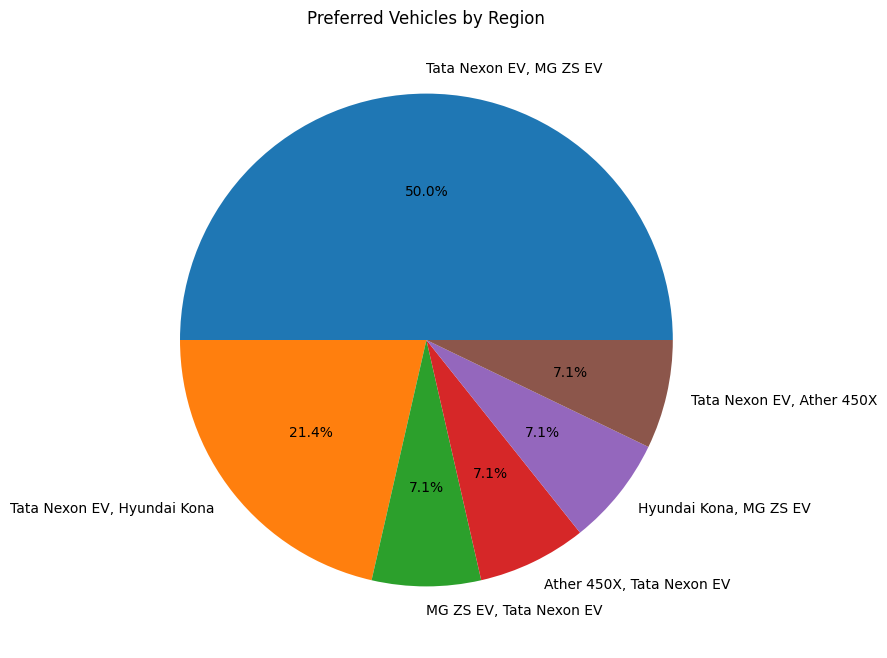

In [ ]:
# Visualize preferred vehicles by region
preferred_vehicles.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Preferred Vehicles by Region')
plt.ylabel('')
plt.show()


These steps will help you explore the regions, EV sales annually, and preferred vehicles based on the provided dataset and problem statement. Adjustments can be made to the analysis based on specific requirements and further insights needed.









**Conclusion**

The comprehensive analysis of the EV market data has revealed that Mumbai stands out as the city with the highest preference for electric vehicles (EVs). The various plots and graphs consistently indicate that Mumbai residents show a strong inclination towards EV products, particularly sedans and hatchbacks. This preference is supported by multiple data points, including annual EV sales and vehicle preference trends.

In addition to identifying the popular EV models, the analysis highlights that the middle-income demographic in Mumbai plays a crucial role in driving the adoption of EVs. The data suggests that middle-income consumers in Mumbai are more likely to purchase EVs, which aligns with their income levels and lifestyle preferences. This insight is pivotal for the EV startup as it underscores the importance of targeting the middle-income segment with tailored marketing and product strategies.

By focusing on Mumbai and specifically addressing the needs and preferences of the middle-income population, the startup can effectively penetrate the market. Offering competitively priced EV models, with features and benefits that resonate with this demographic, can enhance market acceptance and drive sales growth. Additionally, investing in expanding the charging infrastructure and providing flexible financing options can further support the adoption of EVs in Mumbai.

In conclusion, the data-driven approach has provided valuable insights into the EV market in Mumbai, revealing key opportunities for the startup to develop and market its EVs. By leveraging these findings, the startup can strategically position itself to capture a significant share of the EV market in Mumbai, ultimately contributing to the broader goal of promoting sustainable transportation solutions.







